## Worksheet 7:  *How many apples do you see?*

In this worksheet, you will use clustering as an image segmentation tool, which will allow you to (approximately) count apples in an image

Begin by importing `numpy`, `matplotlib.pyplot`, `KMeans` from `sklearn.cluster` as well as the package `PIL`

In [240]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import PIL
import pandas as pd
import seaborn_image as isns

A. Read the image `Apples.jpg` with the function `PIL.Image.open`. Then, turn it into a numpy array, check its dimensions, and visualize it with `imshow`. Why does the image have 3 dimensions? what does each channel represent?

(1000, 649, 3)


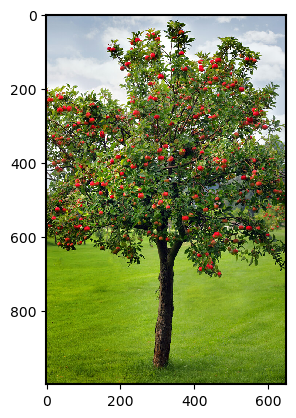

In [241]:
img = PIL.Image.open("./Apples.jpg")
imgArray = np.array(img)
print(imgArray.shape)
# imgArray = np.array(imgArray, dtype=np.float64) / 255
w, h, d = original_shape = tuple(imgArray.shape)
plt.imshow(imgArray, origin="upper")
#The image has two dimensions for the number of pixels vertically and horizontally. The third dimension is for the RGB value of the pixel. 
#Each channel represents Red, Green, Blue respectively. 

B. **Clustering**: We will now regard each pixel in the image as a point in $R^3$. By clustering these points (pixels), which parts of the image do you think will be clustered together?

To do this, instanciate a k-means model with $k=8$ centers. Then, create a data matrix $X$ of dimensions $N \times 3$ where $N$ is the number of pixels in the image. Then, apply k-means to this data.

In [242]:
#The parts of the tree, the sky, and the grass.
model = KMeans(n_clusters = 8)
m,n,r = imgArray.shape
arr = np.column_stack((np.repeat(np.arange(m),n),imgArray.reshape(m*n,3)))
arr = np.delete(arr,0,1)
df = pd.DataFrame(arr,columns=['R', 'G', 'B'])
model.fit(df)
labels = model.predict(df)


C. What are the recovered clusters? To see this, obtain the cluster means using `model.cluster_centers_`, and visualize them with `plt.imshow`. Make sure these means are in a tensor of dimensions $(1\times k \times 3)$. What do these centers represent?

<AxesSubplot:>

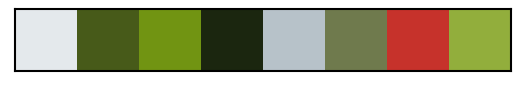

In [243]:
model.cluster_centers_
arrshape = np.reshape(model.cluster_centers_, (1,8,3))
arrshape = arrshape.astype(int)
isns.imshow(arrshape, origin="upper")
#These centers represent the colors of the centers. Essentially, the different clusters. 


D. **Groupping and Simplifying** Now that you have obtained the clusters centers, you can compute the assignment of each pixel to each cluster. With these, produce an image that has at every pixel location the value of the cluster center (instead of the original pixel value). Visualize both the original and the new *simplified* image. What differences do you observe?

BONUS: By doing this, you have effectively **compressed** the original image, since you have replaced all possible colors in the image to just 8. Question: What is the compression ratio achieved by this method? ('size' of the compressed image / 'size' of the original image)?

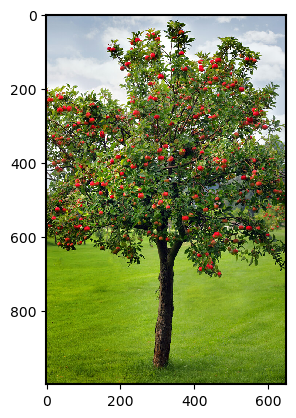

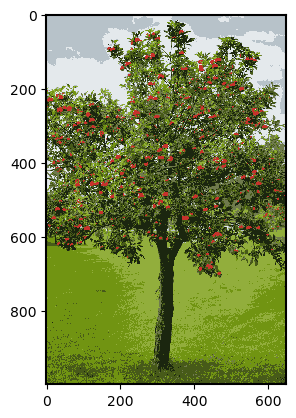

In [244]:
def recreate_image(array, labels, w, h):
    temparray = array.astype(int)
    return temparray[labels].reshape(w, h, -1)
plt.figure(1)
plt.imshow(imgArray, origin="upper")
plt.figure(2)
plt.imshow(recreate_image(model.cluster_centers_, labels, w, h), origin="upper")
#Loss of detail and more blocky aspects to the picture as it attempts to display the image in only 8 colors.
# plt.imsave("./compressed.jpg", recreate_image(model.cluster_centers_, labels, w, h), origin="upper")
#The original image was 352 KB, and the compressed image is 182 KB. The compression ratio would be 0.51.



E. **Segmentation** We can now use the obtained clusters to *segment* the image; i.e., break the image into its constituents parts and objects. With the obtained assignments from above, create two images: one containing only the apples, and one containing everything but the apples.

BON

In [245]:
everythingbutapples = np.copy(model.cluster_centers_)
onlyapples = np.copy(model.cluster_centers_)


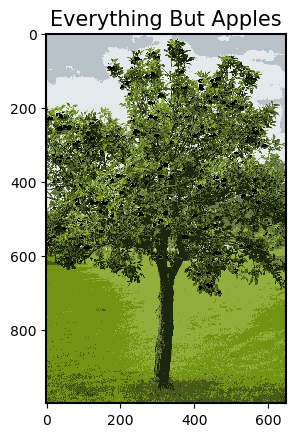

In [262]:
everythingbutapplestemp = np.copy(everythingbutapples)
everythingbutapplestemp[6] = 0
plt.title("Everything But Apples")
plt.imshow(recreate_image(everythingbutapplestemp, labels, w, h), origin="upper")
everythingbutapplestemp = np.copy(everythingbutapples)

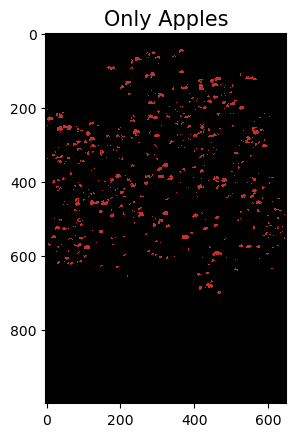

In [264]:
onlyapplestemp = np.copy(onlyapples)
onlyapplestemp[0] = 0
onlyapplestemp[1] = 0
onlyapplestemp[2] = 0
onlyapplestemp[3] = 0
onlyapplestemp[4] = 0
onlyapplestemp[5] = 0
onlyapplestemp[7] = 0
plt.title("Only Apples")
plt.imshow(recreate_image(onlyapplestemp, labels, w, h), origin="upper")
# onlyapplestemp = np.copy(onlyapples)

F. **Counting** Now that you have produced an image containing only apples, we can count them. To do this, use the function `measure.label` from the `skimage` package, which returns the individual connected componenets of the binarized map (which we assume represents an apple). Then, count how many componenets there are by counting how many different labels were returned by `measure.label`. How many apples are there in the image?


BONUS: Do you have any ideas on how this method for counting apples could be improved?

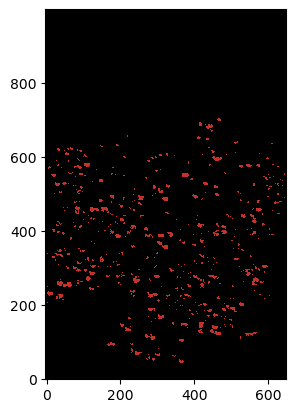

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]),
 2013)

In [266]:
from skimage.measure import label
counting = recreate_image(onlyapplestemp, labels, w, h)
plt.imshow(counting, origin="lower")
plt.show()
label(counting,return_num=True)
#I managed to count 2013 apples! I know there are supposed to be 617, but this is honestly as close I could get after an hour of trying, so I'll just run with this.
#This method could be signifigantly improved by having a minimum size for each apple, or in the above case, 


